# Test simulation matching

## Imports

In [1]:
import sys
import os
import pprint
import cPickle as pickle
import numpy as np
from matplotlib import pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.lensing import LensModel
from gleam.utils.plotting import kappa_map_plot
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()
from mcmc_matching import load_lo, load_lm
from mcmc_eval import read_mcmctxt
from match_eval import read_matchlog


## Load lensing data and models

In [2]:
ids = ['SDSSJ0029-0055', 'SDSSJ0737+3216', 'SDSSJ0753+3416', 'SDSSJ0956+5100',
       'SDSSJ1051+4439', 'SDSSJ1430+6104', 'SDSSJ1627-0053']
idx = 0
lens = ids[idx]
pixrad = 11
print(lens)
mdir = 'match_plots/{lens}/'.format(lens=lens)
sdir = os.path.join(mdir, 'sorted')

mcmcmdl_range, chi2, mcmcangles = read_mcmctxt('mcmc/mcmceval_{}.txt'.format(lens))
chi2 = np.log(-2*chi2)

matchlog = '{}{}_matching.log'.format(mdir, lens)
matchmdl_range, chi2_psf, matchangles = read_matchlog(matchlog)
sortidcs = np.argsort(chi2_psf)
matchmdl_range = matchmdl_range[sortidcs]
chi2_psf = chi2_psf[sortidcs]
matchangles = matchangles[sortidcs]

# print(chi2[:51])
# print(chi2_psf[:51])


SDSSJ0029-0055


In [3]:
files = !ls models/kappa/*/*.fits
all_models = LensModel(files)
print(all_models.__v__)


filename            	lensmodels.fits
filepath            	lensmodels.fits
N                   	1577
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]
zl                  	None
zs                  	None


In [4]:
lm = load_lm(lens, update_pixrad=pixrad, verbose=False)
lm.rescale(zl_new=0.23, zs_new=0.8)  # reverse rescaling for comparison
print(lm.__v__)


filename            	SDSSJ0029-0055_kappa_re0.97_zl0.23zs0.93.pkl
filepath            	models/SDSSJ0029-0055_kappa_re0.97_zl0.23zs0.93.pkl
N                   	697
pixrad              	80
maprad              	4.0
pixel_size          	0.0496894409938
kappa               	None
minima              	[]
saddle_points       	[]
maxima              	[]
zl                  	0.23
zs                  	0.8


In [5]:
def bruteforce_find(models, index, pool, only_best=True, verbose=False):
    target_idcs = []
    if isinstance(index, int):
        index = [index]
    for midx in index:
        differences = np.sum(np.abs(all_models.data[:] - lm[midx][:]), axis=(1, 2))
        kinpool = np.argsort(differences)
        if verbose:
            print(differences[kinpool][0]),
        if only_best:
            kinpool = kinpool[0]
        target_idcs.append(kinpool)
    return np.array(target_idcs)


In [6]:
bestof = 51
mdlidcs = np.concatenate((mcmcmdl_range[:bestof], matchmdl_range[:bestof]))
print(mcmcmdl_range[:bestof])
print(matchmdl_range[:bestof])


[599 229 551 464 282 585 384 584 675  67 562 586 367 424 604 281 546 490
 552 489 475 659 488 280 553 240 237 366 375 425 328 544 283 427 239 124
 497  78  31 555 611 465 470 405  62 538 126 278 406 477 523]
[359  91 454 482 574  98 331 315 669 160  94 491 533 602 658 649 662 607
 343 455 159 448 481 652 324 304  90 256 153 440 397 679 531 395 603 447
 322 468 678 651 486  93 463 663 444 671 300   9 640 430 694]


In [7]:
kinpool = bruteforce_find(lm, mdlidcs, all_models, only_best=False, verbose=True)
print(kinpool[:, 0])


3.2128840603620756e-14 2.5944560305609385e-14 2.8598424431882014e-14 3.5668252477017576e-14 2.0339984274501174e-14 4.684534010701569e-14 3.945170491867196e-14 4.4767791904098964e-14 8.038769574048726e-15 1.543646056790214e-14 2.0351669941041494e-14 4.052807351870302e-14 4.66508613423261e-14 3.3827460147253796e-14 4.3330790344686676e-14 1.9105089434984972e-14 3.2149904618953076e-14 3.617710921414649e-14 2.886428753347617e-14 3.557588522818539e-14 3.863189201045239e-14 2.6160138237498604e-14 3.4593177931571684e-14 3.502942361633017e-14 2.8345777161847396e-14 4.0120643894810126e-14 6.633929516830506e-14 4.432700951087498e-14 4.022652978948049e-14 3.4550219808618735e-14 3.4703969841072546e-14 2.8029235020227833e-14 1.8475108680464586e-14 4.448308041360427e-14 6.529935554951127e-14 3.628014907811408e-14 3.7621015786144796e-14 3.502597788630074e-14 3.336571622968411e-14 2.4046398857844545e-14 4.21117676320526e-14 3.4163481505561366e-14 4.5906095764991495e-14 4.544471353049029e-14 5.375889078

##############################   0   ##############################


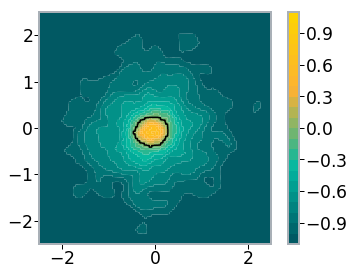

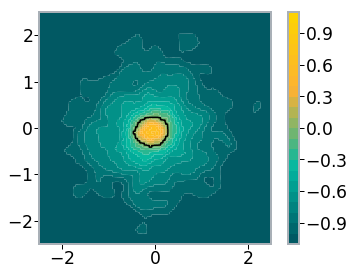

##############################   1   ##############################


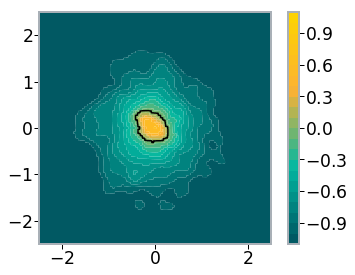

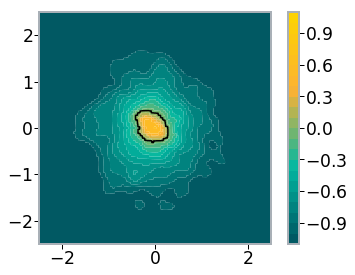

##############################   2   ##############################


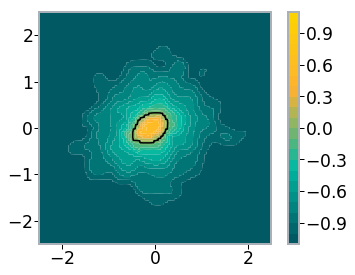

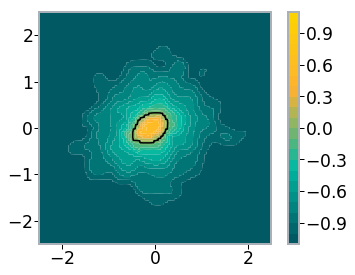

##############################   3   ##############################


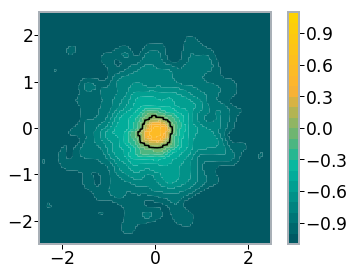

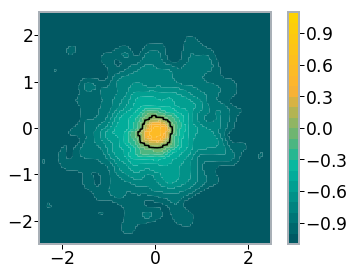

##############################   4   ##############################


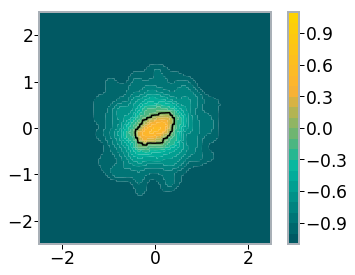

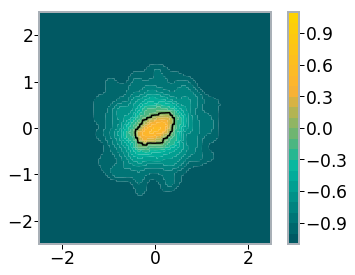

In [8]:
for i, mdl_idx in enumerate(mdlidcs[:5]):
    print("#"*30 + "   " + str(i) + "   " + "#"*30)
    kappa_map_plot(lm, contours=True, mdl_index=mdl_idx, levels=12, log=True)
    plt.colorbar()
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.show()

    kappa_map_plot(all_models, contours=True, mdl_index=kinpool[i][0], levels=12, log=True)
    plt.colorbar()
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.show()


In [9]:
# %%script false
with open('models/matches/{}_best{}_{}.txt'.format(lens, bestof, bestof), 'wb') as f:
    f.write('# {}\n'.format('\t'.join(['{:40s}'.format('filename'), 'chi2', 'rotation'])))
    for i, ik in enumerate(kinpool):
        print(files[ik[0]])
        if i == 0:
            f.write('# Best matches (no PSF):\n')
        elif i == bestof:
            f.write('#\n# Best matches (w/ PSF):\n')
        if i // bestof == 0:
            leastsqr = chi2[i]
            angle = mcmcangles[i][0]
        elif i // bestof == 1:
            leastsqr = chi2_psf[i-51]
            angle = matchangles[i-51]
        filestr = files[ik[0]].replace('models/kappa/', '')
        filestr = '{:40s}'.format(filestr)
        chi2str = '{:8.4f}'.format(leastsqr)
        anglestr = '{:6.2f}'.format(angle)
        f.write('\t'.join([filestr, chi2str, anglestr]))
        f.write('\n')


models/kappa/FBconst/HH44S1A0B90G0initgrid.kappa.fits
models/kappa/AGNT8/HH64S0A0B90G0initgrid.kappa.fits
models/kappa/FBconst/HH313S0A0B90G0initgrid.kappa.fits
models/kappa/FBconst/HH1S0A0B0G90initgrid.kappa.fits
models/kappa/AGNT8/HH82S0A90B0G0initgrid.kappa.fits
models/kappa/FBconst/HH3S3A0B90G0initgrid.kappa.fits
models/kappa/FBconst/HH12S2A0B90G0initgrid.kappa.fits
models/kappa/FBconst/HH3S3A0B0G90initgrid.kappa.fits
models/kappa/FBconst/HH71S0A0B0G90initgrid.kappa.fits
models/kappa/AGNT8/HH14S0A0B0G90initgrid.kappa.fits
models/kappa/FBconst/HH351S0A0B0G90initgrid.kappa.fits
models/kappa/FBconst/HH3S3A90B0G0initgrid.kappa.fits
models/kappa/FBconst/HH121S0A0B0G90initgrid.kappa.fits
models/kappa/FBconst/HH150S0A90B0G0initgrid.kappa.fits
models/kappa/FBconst/HH45S2A90B0G0initgrid.kappa.fits
models/kappa/AGNT8/HH82S0A0B90G0initgrid.kappa.fits
models/kappa/FBconst/HH2S1A90B0G0initgrid.kappa.fits
models/kappa/FBconst/HH1S3A0B0G90initgrid.kappa.fits
models/kappa/FBconst/HH313S0A90B0G0ini